In [203]:
cls_path = "/storage/slurm/schnackl/fakesync/cav-mae-sync/outputs/mavos/cls_test"

In [204]:
import pickle as pkl
import os
import pandas as pd
import torch

In [205]:
logs = []

for file in os.listdir(cls_path):
    if file.endswith(".pkl"):
        print("loadeing", file)
        data = pkl.load(open(os.path.join(cls_path, file), "rb"))
        logs.append(data)
        break

loadeing forward_embeddings_0.pkl


In [206]:
df = pd.DataFrame()
for batch in logs:
    df = pd.concat([df, pd.DataFrame(batch)], ignore_index=True)

In [207]:
logs[0]

{'video_name': ['/storage/slurm/schnackl/fakesync/data/mavosdd/dataset/english/hififace/9211-cbtkoZUOR1A_36_9.mp4',
  '/storage/slurm/schnackl/fakesync/data/mavosdd/dataset/spanish/inswapper/25340-WLXiu-qp8Lw_17_1.mp4',
  '/storage/slurm/schnackl/fakesync/data/mavosdd/dataset/romanian/real/WxdaDqICMP8_433_2.mp4',
  '/storage/slurm/schnackl/fakesync/data/mavosdd/dataset/mandarin/hififace/14528-DCeJZTSFTXs_13_3.mp4'],
 'label': [tensor([0., 1.]),
  tensor([0., 1.]),
  tensor([1., 0.]),
  tensor([0., 1.])],
 'audio_out': [array([[[-1.8926798 , -0.9850975 ,  0.702809  , ..., -0.27282155,
            0.8904062 , -0.83340484],
          [-1.3128966 , -0.02876157,  1.6431414 , ..., -0.3466546 ,
            0.8800967 , -0.08478106],
          [-1.0566934 ,  0.22150756,  2.1299748 , ..., -0.5874115 ,
            0.75373816, -0.24813731],
          ...,
          [-2.2072866 ,  0.45924798,  1.3558831 , ..., -0.68644667,
            0.6619038 , -0.36077914],
          [-2.0393503 ,  0.21720366,  

In [208]:
df.cls_a.iloc[0]

array([[-0.59221333, -0.8993628 ,  2.2295222 , ..., -1.5558274 ,
         1.0845399 , -1.1000984 ],
       [-0.93312687,  0.06796425,  1.6971431 , ..., -0.8567115 ,
         0.41060728, -0.30362257],
       [-0.93312687,  0.06796425,  1.6971431 , ..., -0.8567115 ,
         0.41060728, -0.30362257],
       ...,
       [-0.93312687,  0.06796425,  1.6971431 , ..., -0.8567115 ,
         0.41060728, -0.30362257],
       [-0.93312687,  0.06796425,  1.6971431 , ..., -0.8567115 ,
         0.41060728, -0.30362257],
       [-0.93312687,  0.06796425,  1.6971431 , ..., -0.8567115 ,
         0.41060728, -0.30362257]], shape=(16, 768), dtype=float32)

In [209]:
for col in df.columns:
    print(col, df[col].iloc[0].shape if isinstance(df[col].iloc[0], np.ndarray) else df[col].iloc[0])

video_name /storage/slurm/schnackl/fakesync/data/mavosdd/dataset/english/hififace/9211-cbtkoZUOR1A_36_9.mp4
label tensor([0., 1.])
audio_out (16, 512, 768)
video_out (16, 196, 768)
cls_a (16, 768)
cls_v (16, 768)


In [210]:
cls_v = torch.tensor(df.cls_v.iloc[0])
cls_a = torch.tensor(df.cls_a.iloc[0])

In [211]:
print((cls_v[0:16] - cls_v[0]).abs().sum(dim=1))
print((cls_a[0:16] - cls_a[0]).abs().sum(dim=1))
# print(torch.allclose(video_flat[0], video_flat[1]))

tensor([ 0.0000, 26.9539, 36.4083, 32.1379, 31.1849, 26.9174, 35.9882, 29.2938,
        34.4360, 31.6176, 39.6204, 37.0981, 36.9325, 36.3138, 33.6748, 42.7168])
tensor([  0.0000, 563.3846, 563.3846, 563.3846, 563.3846, 563.3846, 563.3846,
        563.3846, 563.3846, 563.3846, 563.3846, 563.3846, 563.3846, 563.3846,
        563.3846, 563.3846])


In [212]:
np.mean(df.cls_a.iloc[0], axis=0)
# only first entry similar

array([-9.11819577e-01,  7.50631280e-03,  1.73041713e+00, -5.04163206e-01,
        1.81846619e+00, -9.20384467e-01,  9.11653996e-01,  1.94537584e-02,
       -9.57984388e-01,  2.81950831e-01,  8.78401160e-01,  8.48965228e-01,
        6.01560771e-01, -3.47303212e-01, -1.03470922e+00, -2.32019573e-01,
        5.59507191e-01,  1.31090140e+00, -6.93247676e-01,  2.19772056e-01,
       -2.54182190e-01, -6.38675213e-01,  7.06518292e-02, -2.58214384e-01,
        7.51828671e-01, -1.03403807e+00,  3.00504833e-01, -3.77281696e-01,
       -4.04437721e-01, -1.10428798e+00, -3.98537427e-01, -1.07607317e+00,
       -6.13539338e-01,  3.89942199e-01, -1.10412371e+00,  1.88151276e+00,
       -1.04967296e+00,  8.46634030e-01, -5.48205554e-01, -7.30162203e-01,
       -1.15633750e+00,  4.86876555e-02,  1.25670004e+00,  2.81894822e-02,
       -1.27134967e+00, -4.75676566e-01, -1.46070051e+00,  1.29952997e-01,
        1.85943283e-02,  9.81138051e-01, -1.63468051e+00,  9.39972878e-01,
        5.02471566e-01,  

In [213]:
df

,video_name,label,audio_out,video_out,cls_a,cls_v
0,/storage/slurm/schnackl/fakesync/data/mavosdd/...,"[tensor(0.), tensor(1.)]","[[[-1.8926798, -0.9850975, 0.702809, 0.722611,...","[[[-0.082128525, -0.6477259, -2.1078393, -1.47...","[[-0.59221333, -0.8993628, 2.2295222, -0.00507...","[[0.6440959, 0.03231627, -0.3326879, -1.247373..."
1,/storage/slurm/schnackl/fakesync/data/mavosdd/...,"[tensor(0.), tensor(1.)]","[[[-1.3512003, -1.2130789, 1.6990013, 0.001899...","[[[-0.35966778, 0.24185938, -0.25438693, -0.87...","[[-0.8433851, -0.44037944, 2.4319494, 0.001604...","[[0.54980356, 0.30673814, -0.4113633, -0.87519..."
2,/storage/slurm/schnackl/fakesync/data/mavosdd/...,"[tensor(1.), tensor(0.)]","[[[-1.3120068, -1.4089684, 1.7352618, -0.23064...","[[[-1.0145583, 0.6208809, -0.16462626, -1.9827...","[[-0.8250156, -1.0810494, 2.201321, 0.05580233...","[[0.89221764, 0.12797852, -0.7354844, -2.37761..."
3,/storage/slurm/schnackl/fakesync/data/mavosdd/...,"[tensor(0.), tensor(1.)]","[[[-1.0872729, -1.2625636, 1.9643975, -0.56593...","[[[-0.66893774, 0.015091351, -0.37212172, -1.1...","[[-0.78371614, -0.70192593, 2.48837, 0.0275089...","[[0.7590478, -0.31697547, -0.61190635, -1.5795..."


In [229]:
# import cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
# do per time step the cosine sim between cls_a and cls_b
cosine_similarity(
    np.array(df.cls_a.iloc[0]),
    np.array(df.cls_v.iloc[0])
).shape

(16, 16)

In [247]:
import numpy as np
A = np.array(df.cls_a.iloc[0])  # shape (T, D)
V = np.array(df.cls_a.iloc[1])  # shape (T, D)
# A, V: shape (T, D)
A_norm = A / np.linalg.norm(A, axis=1, keepdims=True)
V_norm = V / np.linalg.norm(V, axis=1, keepdims=True)

# elementwise dot product across features → cosine similarity per timestep
similarities = np.sum(A_norm * V_norm, axis=1)  # shape (T,)
similarities

array([0.9346986 , 0.99999994, 0.99999994, 0.99999994, 0.99999994,
       0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999994,
       0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999994,
       0.99999994], dtype=float32)

In [216]:
import random

In [217]:
a = logs[0][4]
b = logs[0][5]
b_shuffled = b
random.shuffle(b_shuffled)
y = cosine_similarity(a, b)
# histogram of y
import matplotlib.pyplot as plt

plt.hist(y, bins=20)
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.title('Histogram of Cosine Similarity between cls_a and cls_v')
plt.show()

KeyError: 4

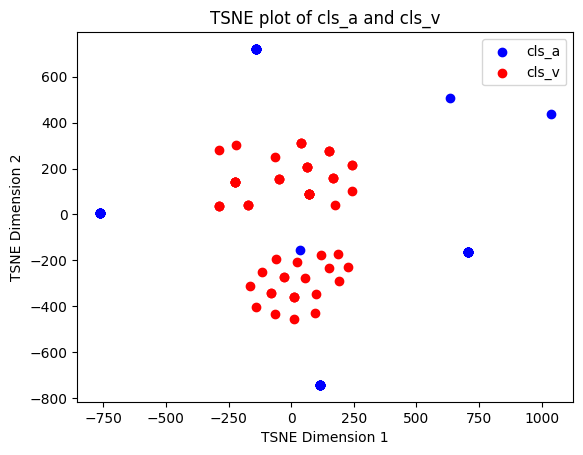

In [ ]:
# tsne plot of cls_a and cls_v
from sklearn.manifold import TSNE   
import numpy as np
tsne = TSNE(n_components=2, random_state=0)
a_2d = tsne.fit_transform(a)

# scatter plot of a_2d
plt.scatter(a_2d[:, 0], a_2d[:, 1], c='blue', label='cls_a')
b_2d = tsne.fit_transform(b)
plt.scatter(b_2d[:, 0], b_2d[:, 1], c='red', label='cls_v')
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.title('TSNE plot of cls_a and cls_v')
plt.legend()

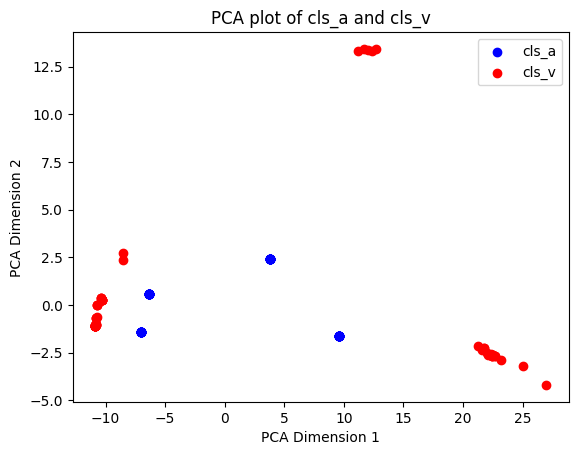

In [ ]:
# pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
a_2d_pca = pca.fit_transform(a)
b_2d_pca = pca.fit_transform(b)
# scatter plot of a_2d_pca and b_2d_pca
plt.scatter(a_2d_pca[:, 0], a_2d_pca[:, 1], c='blue', label='cls_a')
plt.scatter(b_2d_pca[:, 0], b_2d_pca[:, 1], c='red', label='cls_v')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.title('PCA plot of cls_a and cls_v')
plt.legend()
plt.show()

In [ ]:
np.sum(np.abs(np.array(logs[0][5][0]) - np.array(logs[0][5][3])))

/tmp/ipykernel_1627056/2195032062.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  np.sum(np.abs(np.array(logs[0][5][0]) - np.array(logs[0][5][3])))


np.float32(50.678024)

In [ ]:
# scatter plot of cls_a vs cls_v